In [33]:
#"""
from google.colab import drive
drive.mount('/content/drive')
#"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Importing the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Importing the training dataset
dataset_train = pd.read_csv('datasets_20469_26460_Google_Stock_Price_Train.csv')

In [36]:
# Get the column of "open" price
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [37]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [38]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [39]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [40]:
# Importing the Keras libraries and packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [41]:
# Initialising the RNN
regressor = Sequential()

# Adding the first the LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding a second LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding output layer
regressor.add(Dense(units=1))

# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# Fit the RNN to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0452
Epoch 2/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 13/100
38/38 [=====

In [43]:
# Load the test dataset
dataset_test = pd.read_csv('datasets_20469_26460_Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [44]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

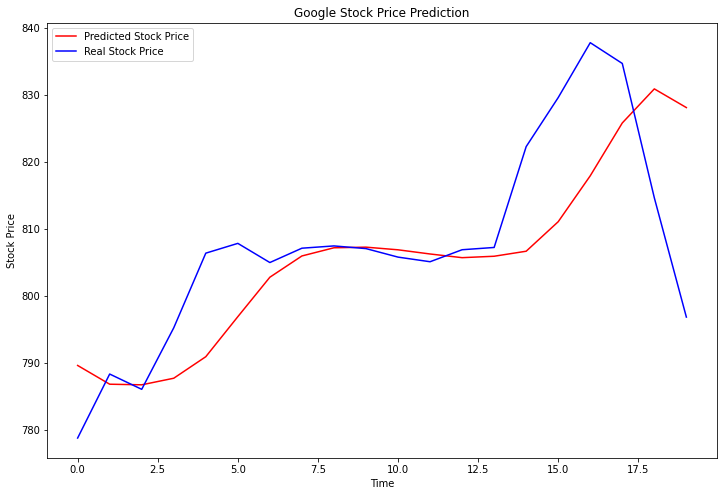

In [45]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()